# Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Making the data matrix

In [2]:
X = np.array([
    [80, 75, 70, 85],
    [85, 80, 78, 88],
    [78, 72, 68, 80],
    [90, 85, 88, 92],
    [82, 77, 73, 84]
])

In [3]:
X

array([[80, 75, 70, 85],
       [85, 80, 78, 88],
       [78, 72, 68, 80],
       [90, 85, 88, 92],
       [82, 77, 73, 84]])

### Calculating mean of each column

In [4]:
means = np.mean(X, axis=0)


In [5]:
means

array([83. , 77.8, 75.4, 85.8])

# Centralizing the Matrix

In [6]:
X_centered = X - means

In [7]:
X_centered

array([[-3. , -2.8, -5.4, -0.8],
       [ 2. ,  2.2,  2.6,  2.2],
       [-5. , -5.8, -7.4, -5.8],
       [ 7. ,  7.2, 12.6,  6.2],
       [-1. , -0.8, -2.4, -1.8]])

## Finding Co Variance matrix

In [8]:
cov_matrix = np.cov(X_centered, rowvar=False)


In [9]:
cov_matrix

array([[22.  , 23.25, 37.25, 20.25],
       [23.25, 24.7 , 39.1 , 21.7 ],
       [37.25, 39.1 , 63.8 , 33.85],
       [20.25, 21.7 , 33.85, 20.2 ]])

# Finding Eigen Values and Eigen Vectors

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [11]:
eigenvalues

array([1.28594959e+02, 4.94397157e-03, 3.01256115e-01, 1.79884126e+00])

In [12]:
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


In [13]:
eigenvalues

array([1.28594959e+02, 1.79884126e+00, 3.01256115e-01, 4.94397157e-03])

In [14]:
eigenvectors

array([[ 0.41311147, -0.05226111,  0.38902978,  0.82174419],
       [ 0.43646141,  0.17363493,  0.69895255, -0.53927514],
       [ 0.7012404 , -0.53026984, -0.44253202, -0.17675185],
       [ 0.38353912,  0.82821107, -0.4053228 ,  0.05174537]])

In [15]:
W = eigenvectors[:, :2]  # shape (4, 2)
X_2d = X_centered.dot(W) # shape (5, 2)

## Ploting the 2D Scatter plot for principal Component 

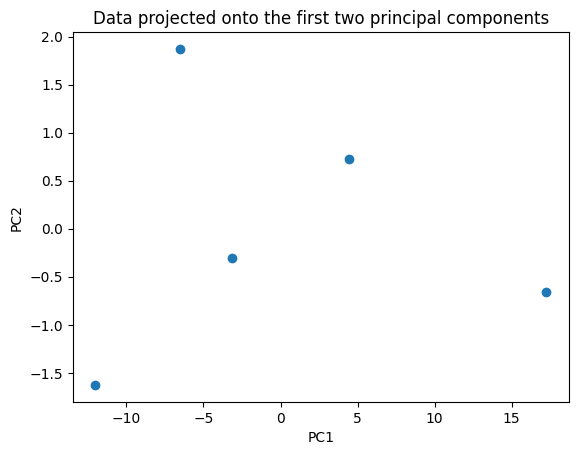

In [16]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data projected onto the first two principal components")
plt.show()

In [17]:
total_variance = np.sum(eigenvalues)
variance_ratio = np.cumsum(eigenvalues) / total_variance
k = np.searchsorted(variance_ratio, 0.90) + 1

In [18]:
print("Eigenvalues:", eigenvalues)
print("Number of components to reach 90% variance:", k)

Eigenvalues: [1.28594959e+02 1.79884126e+00 3.01256115e-01 4.94397157e-03]
Number of components to reach 90% variance: 1
